### **Задание 1 (25 б) Лемматизации текста. Написать програмный модуль для лемматизации текста: лемматизировать текст и приписать леммам частеречные теги. Для решения задачи можно использовать как русские, так и английские словари.**

In [ ]:
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 90.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=4c33fedd60dfd6b6674ac71b0a2599ef48c01cb5c594d3d3e26d4b8b7d6f006b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet as wn

# Инициализируем морфологический анализатор для русского
morph = pymorphy2.MorphAnalyzer()

# Лемматизация русского текста
def lemmatize_ru(text):
    sentences = text.split('\n')
    result = []
    for sentence in sentences:
        words = sentence.split()
        lemmatized_sentence = []
        for word in words:
            word = word.strip(",.!?")  # Убираем пунктуацию
            parsed_word = morph.parse(word)[0]
            tag = parsed_word.tag.POS
            # Приводим теги к нужному инвентарю
            if tag in {'NOUN'}:
                tag = 'S'
            elif tag in {'ADJF', 'ADJS'}:
                tag = 'A'
            elif tag in {'VERB', 'INFN', 'PRTF', 'PRTS', 'GRND'}:
                tag = 'V'
            else:
                tag = 'ADV'
            lemmatized_sentence.append(f"{word}{{{parsed_word.normal_form}={tag}}}")
        result.append(" ".join(lemmatized_sentence))
    return "\n".join(result)

# Пример использования
text_ru = "Лемматизация текста – это способ анализа контента поисковыми роботами, заключающийся в приведении каждого слова в нормальную морфологическую форму для подсчета вхождений."

print("Лемматизация русского текста:")
print(lemmatize_ru(text_ru))

Лемматизация русского текста:
Лемматизация{лемматизация=S} текста{текст=S} –{–=ADV} это{это=ADV} способ{способ=S} анализа{анализ=S} контента{контент=S} поисковыми{поисковый=A} роботами{робот=S} заключающийся{заключаться=V} в{в=ADV} приведении{приведение=S} каждого{каждый=A} слова{слово=S} в{в=ADV} нормальную{нормальный=A} морфологическую{морфологический=A} форму{форма=S} для{для=ADV} подсчета{подсчёт=S} вхождений{вхождение=S}


### **Задание 2 (25 б) Разработка и тестирование метода автоматического реферирования.**

In [ ]:
!pip install nltk
# Загрузка необходимого ресурса NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize
import numpy as np
import nltk

# Функция для загрузки текста из файла
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Функция для извлечения ключевых предложений
def extract_key_sentences(text, num_sentences=3):
    sentences = sent_tokenize(text)
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(sentences)
    sentence_scores = np.array(X.sum(axis=1)).ravel()
    ranked_sentences_idx = sentence_scores.argsort()[::-1][:num_sentences]
    return [sentences[i] for i in ranked_sentences_idx]

# Функция для создания краткого вывода (summary) на основе ключевых предложений
def summary(sentences):
    return ' '.join(sentences)

# Загрузка и обработка документов
doc1 = load_text('article1.txt')
doc2 = load_text('article2.txt')
doc3 = load_text('article3.txt')

# Задание 1: Экстракт по 3 предложения из каждого документа
summary1_sentences = extract_key_sentences(doc1, 3)
summary2_sentences = extract_key_sentences(doc2, 3)
summary3_sentences = extract_key_sentences(doc3, 3)

summary1 = summary(summary1_sentences)
summary2 = summary(summary2_sentences)
summary3 = summary(summary3_sentences)

# Задание 2: Экстракт 6 предложений из всех документов
all_docs = doc1 + " " + doc2 + " " + doc3
summary_all_sentences = extract_key_sentences(all_docs, 6)
summary_all = summary(summary_all_sentences)

# Задание 3: Выводы
print("\n3 предложения article1:")
print(summary1)
print("\n3 предложения article2:")
print(summary2)
print("\n3 предложения article3:")
print(summary3)
print("\nЭкстракт 6 предложений из всех документов:")
print(summary_all)


3 предложения article1:
With growing use
of the World Wide Web, the revenue loss due to
plagiarism and pirate copies has been escalating
exponentially. Amongst these characteristics of 
music, melody is considered to be the most creative 
specific and expressive element that characterizes
music. When two music share the unique parts of
melody which is rarely uses in others, plagiarism can be suspected.

3 предложения article2:
Introduction 
Recently, the use of various types of multimedia data such as images, videos, and 
audios has shown its explosive growth, so the content-based search became of great 
importance[12][7][13][5][4][3]. In this paper, we address the development of a system that detects plagiarism 
based on the similar melody searching, which is an operation that finds the melodies 
similar to a given query melody from a music database. Unlike such previous systems as [6][8][9][10], our plagiarism detection system has 
its unique characteristics as follows: 
• A novel s

### **Задание 3 (25 б) Разработка и тестирование определения тональности текста.**

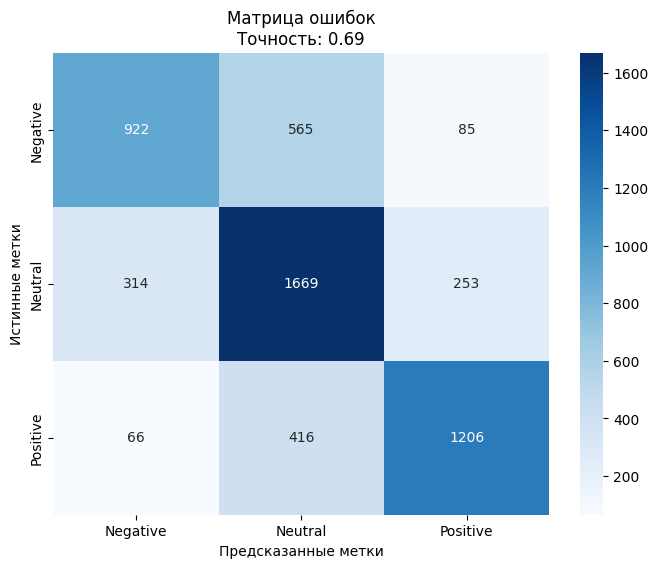

Точность модели: 0.69


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Шаг 1: Загрузка данных
df = pd.read_csv('train.csv')

# Шаг 2: Очистка данных от NaN в тексте
df_clean = df.dropna(subset=['text'])

# Шаг 3: Определение признаков (X) и целевой переменной (y)
X_clean = df_clean['text']
y_clean = df_clean['sentiment']

# Шаг 4: Разделение данных на тренировочный и тестовый наборы
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Шаг 5: Векторизация текста с помощью TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Ограничиваем до 5000 признаков для оптимизации
X_train_vec_clean = vectorizer.fit_transform(X_train_clean)
X_test_vec_clean = vectorizer.transform(X_test_clean)

# Шаг 6: Обучение классификатора (логистическая регрессия)
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec_clean, y_train_clean)

# Шаг 7: Предсказание тональности на тестовом наборе
y_pred_clean = clf.predict(X_test_vec_clean)

# Шаг 8: Оценка точности и построение матрицы ошибок
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
cm_clean = confusion_matrix(y_test_clean, y_pred_clean)

# Шаг 9: Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm_clean, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title(f'Матрица ошибок\nТочность: {accuracy_clean:.2f}')
plt.show()

# Вывод точности
print(f'Точность модели: {accuracy_clean:.2f}')


In [ ]:
# Проверка текста через ввод пользователя
def check_sentiment(text):
    # Преобразуем введенный текст с помощью TF-IDF (с учетом уже обученного векторизатора)
    text_vec = vectorizer.transform([text])

    # Предсказываем тональность
    prediction = clf.predict(text_vec)

    return prediction[0]

# Ввод текста пользователем
user_input = input("Введите предложение для определения тональности: ")

# Определение тональности введенного текста
result = check_sentiment(user_input)
print(f"Тональность текста: {result}")

Введите предложение для определения тональности: Sons of ****
Тональность текста: neutral


### **Задание 4 (25 б) Разработка и тестирование методов выделения упоминаний о чем либо в тексте.**

In [ ]:
import pandas as pd

# Load the dataset to inspect its structure
file_path = 'all_lyrics.csv'
data = pd.read_csv(file_path)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Загрузка стоп-слов и лемматизатора
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Загрузка данных
file_path = 'all_lyrics.csv'
data = pd.read_csv(file_path)

# Удаление строк с отсутствующими текстами
data_clean = data.dropna(subset=['lyrics'])

# Функция для очистки и токенизации текстов
def preprocess_lyrics(lyrics):
    # Удаляем текст в квадратных скобках и сами скобки
    lyrics_cleaned = re.sub(r'\[.*?\]', '', lyrics)
    # Удаляем специальные символы и переводим в нижний регистр
    lyrics_cleaned = re.sub(r'[^\w\s]', '', lyrics_cleaned.lower())
    # Токенизация
    words = lyrics_cleaned.split()
    # Лемматизация и удаление стоп-слов
    words_filtered = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words_filtered)  # Возвращаем слова как строку

# Применяем обработку к текстам с использованием .loc
data_clean.loc[:, 'processed_lyrics'] = data_clean['lyrics'].apply(preprocess_lyrics)

# Просмотр обработанных данных
print(data_clean[['type', 'processed_lyrics']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   type                                   processed_lyrics
0  rock  stairway heaven lyric there lady who sure glit...
1  rock  hey jude lyric hey jude dont make bad take sad...
2  rock  ii tambourine lyric hey pip play tambourine ma...
3  rock  sin título lyric hay tres niñas jipis en la ha...
4  rock  like rolling stone lyric upon time dressed fin...


<ipython-input-36-70ff6cc4638d>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.loc[:, 'processed_lyrics'] = data_clean['lyrics'].apply(preprocess_lyrics)


### Десять наиболее часто встречающихся слов для каждого жанра песен;

In [ ]:
from collections import Counter

def most_common_words_by_genre(data, n=10):
    results = {}
    for genre in data['type'].unique():
        genre_lyrics = data[data['type'] == genre]['processed_lyrics']
        all_words = [word for lyrics in genre_lyrics for word in lyrics.split()]
        common_words = Counter(all_words).most_common(n)
        results[genre] = common_words
    return results

# Assuming data_clean is your DataFrame
common_words_results = most_common_words_by_genre(data_clean)

# Formatting output
for genre, words in common_words_results.items():
    word_list = ', '.join([f"{word} - {count}" for word, count in words])
    print(f"{genre}: {word_list}")

rock: im - 2327, dont - 2158, love - 2053, oh - 2017, know - 1841, like - 1692, got - 1670, yeah - 1668, get - 1490, come - 1478
country: 2018 - 2876, like - 2475, love - 2379, im - 2378, dont - 2332, one - 2271, know - 2089, time - 1701, got - 1607, go - 1489
R&B: love - 4966, im - 3682, baby - 3680, dont - 3170, know - 3048, oh - 2975, like - 2747, yeah - 2425, get - 2366, got - 2066
rap & hip hop: im - 6880, feat - 6150, like - 5808, get - 4855, nigga - 4041, got - 3675, dont - 3353, know - 3323, one - 2477, man - 2421


### Наиболее часто встречающиеся слова из определенной категории для каждого жанра песен. Примеры категорий: упоминаний времени суток, сезонов года, частей тела, грамматических категорий и т.п.;

In [ ]:
import spacy
from collections import Counter

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Example categories
categories = {
    'times of day': ['morning', 'afternoon', 'evening', 'night'],
    'seasons': ['winter', 'spring', 'summer', 'autumn'],
    'body parts': ['head', 'arm', 'leg', 'eye'],
}

def count_grammatical_categories(text):
    doc = nlp(text)
    counts = {
        'nouns': 0,
        'verbs': 0,
        'adjectives': 0,
        'adverbs': 0,
    }

    for token in doc:
        if token.pos_ == 'NOUN':
            counts['nouns'] += 1
        elif token.pos_ == 'VERB':
            counts['verbs'] += 1
        elif token.pos_ == 'ADJ':
            counts['adjectives'] += 1
        elif token.pos_ == 'ADV':
            counts['adverbs'] += 1

    return counts

def count_specific_mentions(text, categories):
    mention_counts = {key: 0 for key in categories.keys()}

    for category, keywords in categories.items():
        for keyword in keywords:
            mention_counts[category] += text.lower().count(keyword.lower())

    return mention_counts

def analyze_genres(data):
    results = {}
    for genre in data['type'].unique():
        genre_lyrics = data[data['type'] == genre]['processed_lyrics']

        # Process the lyrics in chunks to avoid exceeding the max length
        category_counts = {
            'grammatical_counts': {'nouns': 0, 'verbs': 0, 'adjectives': 0, 'adverbs': 0},
            'specific_mentions': {key: 0 for key in categories.keys()},
        }

        for lyrics in genre_lyrics:
            # Count grammatical categories
            grammatical_counts = count_grammatical_categories(lyrics)
            for key in category_counts['grammatical_counts']:
                category_counts['grammatical_counts'][key] += grammatical_counts[key]

            # Count specific mentions
            specific_mentions = count_specific_mentions(lyrics, categories)
            for key in category_counts['specific_mentions']:
                category_counts['specific_mentions'][key] += specific_mentions[key]

        results[genre] = category_counts

    return results

# Assuming data_clean is your DataFrame
results = analyze_genres(data_clean)

# Formatting output
for genre, counts in results.items():
    grammatical_list = ', '.join([f"{category} - {count}" for category, count in counts['grammatical_counts'].items()])
    mention_list = ', '.join([f"{category} - {count}" for category, count in counts['specific_mentions'].items()])

    print(f"{genre}:")
    print(f"  Grammatical counts: {grammatical_list}")
    print(f"  Specific mentions: {mention_list}")

rock:
  Grammatical counts: nouns - 86634, verbs - 56567, adjectives - 27777, adverbs - 12908
  Specific mentions: times of day - 1754, seasons - 257, body parts - 2017
country:
  Grammatical counts: nouns - 108375, verbs - 72738, adjectives - 38038, adverbs - 19013
  Specific mentions: times of day - 2160, seasons - 433, body parts - 2477
R&B:
  Grammatical counts: nouns - 116995, verbs - 80328, adjectives - 37249, adverbs - 16934
  Specific mentions: times of day - 1760, seasons - 211, body parts - 2225
rap & hip hop:
  Grammatical counts: nouns - 199100, verbs - 106787, adjectives - 63908, adverbs - 19337
  Specific mentions: times of day - 1341, seasons - 352, body parts - 3569


### Слова, которые встречаются в каждом жанре песен не более 3 раз.

In [ ]:
def rare_words_in_genres(data, max_count=3):
    results = {}
    for genre in data['type'].unique():
        genre_lyrics = data[data['type'] == genre]['processed_lyrics']
        all_words = [word for lyrics in genre_lyrics for word in lyrics.split()]
        word_counts = Counter(all_words)

        # Words that appear no more than max_count times
        rare_words = {word: count for word, count in word_counts.items() if count <= max_count}
        results[genre] = rare_words

    return results

rare_words_results = rare_words_in_genres(data_clean)

# Formatting output
for genre, words in rare_words_results.items():
    word_list = ', '.join([f"{word} - {count}" for word, count in words.items()])
    print(f"{genre}: {word_list}")

rock: glitter - 1, songbird - 1, misgiven - 1, piper - 3, ohohohohwoahhh - 1, bustle - 3, hedgerow - 1, alarmed - 1, taller - 1, heaven280embed - 1, jude96embed - 1, unearthly - 3, sweetness - 2, lunacy - 1, verbalizes - 1, halfwit - 2, cisgender - 2, confuse - 3, caribbean - 2, speckled - 1, scifi - 1, whalesongs - 1, indigo - 1, biv - 2, bushel - 3, classify - 1, jinglers - 2, jangle - 3, blangwhang - 2, vibrating - 1, limbo - 3, bardo - 1, maddening - 1, juuuuust - 1, quarterdeck - 2, miriam - 1, congregation - 1, esmeralda - 1, flagon - 1, colliding - 2, defined - 2, motown - 2, iconic - 3, edwin - 1, ashford - 2, miriams - 1, coltrain - 1, rapture - 3, yogurt - 1, plantain - 1, lunchbox - 1, henna - 1, tango - 3, colombia - 1, pandereta - 1, india - 3, kanjira - 1, iran - 1, daf - 1, shougu - 1, ukraine - 3, buben - 1, indonesia - 1, rebana - 1, riq - 1, ishmael - 1, ahab - 1, navel - 2, nailed - 2, mast - 2, doubloon - 2, unscrew - 2, crish - 1, jibstay - 2, pipnotpip - 1, toucan